<a href="https://colab.research.google.com/github/peu-savio/peudatascience/blob/main/Analisando_os_Dados_do_Airbnb(Oakland).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Oakland*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Oakland, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Como mencionado anteriormente, os dados utilizados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Utlizaremos o seguinte arquivo para fazer uma breve análise exploratória:
*   `listings.csv` - *Summary information and metrics for listings in Oakland (good for visualisations).*



In [40]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplleaflet

#%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/oakland/2020-10-25/visualisations/listings.csv')

## Análise dos Dados


Urge a necessidade de se investigar como os dados estão estruturados e, assim desenvolver uma consciência situacional inicial. 

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Primeiramente, visualizamos parcialmente o nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3083,Room #2 @ B-Love's Guest House,3518,Traci,NaN,Prescott,37.80832,-122.29300,Private room,43,3,37,2019-08-14,0.49,6,173
1,5739,Mod Studio,9276,Leah And Gyorgy,NaN,Oakland Ave-Harrison St,37.81503,-122.26212,Entire home/apt,125,6,260,2020-10-12,1.89,1,79
2,23637,Share my Charming Home! (1 person or 1 couple ),93339,Mika,NaN,Montclair,37.82925,-122.20966,Private room,63,7,43,2020-03-20,0.33,1,298
3,24916,Rockridge Studio w/garden and Patio,98716,Judy,NaN,Piedmont Avenue,37.83326,-122.25033,Entire home/apt,89,30,112,2019-10-31,0.89,2,292
4,25473,Luxury Flat w/Mediterranean Garden—Upper Rockr...,106078,Lori,NaN,Upper Rockridge,37.83688,-122.23184,Entire home/apt,141,7,18,2018-08-23,0.15,1,111


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O *dataset* obtido do arquivo `listings.csv` é uma versão resumida e com alterações do *dataset* presente no arquivo `listings.csv.gz` disponível no mesmo portal usado para extração de dados.

Para uma melhor interpretação dos dados, é interessante identificar as entradas como alguma moradia a ser alugada e as variáveis como caracterísiticas de cada uma delas.

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# Mostrar os tipos de dados de cada variável
display(df.dtypes)

Entradas:	 2082
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está intimamente ligada à quantidade de valores ausentes apresentados. Portanto, uma análise mais profunda sobre as variáveis propriamente registradas para cada entrada é proveitosa. 

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
porcentagens = (df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

# imprimir a porcentagem de valores ausentes com duas casas decimais
for per, var in zip(porcentagens, porcentagens.index):
  print("{} : {:.2%}".format(var ,per))

neighbourhood_group : 100.00%
reviews_per_month : 26.03%
last_review : 26.03%
availability_365 : 0.00%
calculated_host_listings_count : 0.00%
number_of_reviews : 0.00%
minimum_nights : 0.00%
price : 0.00%
room_type : 0.00%
longitude : 0.00%
latitude : 0.00%
neighbourhood : 0.00%
host_name : 0.00%
host_id : 0.00%
name : 0.00%
id : 0.00%


Percebe-se que `neighbourhood_group` é uma variável morta, pois não há alguma observação válida. Além disso, `reviews_per_month ` e `last_review` apresentam a mesma porcentagem porque ambos valores são ausentes quando não há alguma avaliação. O restante das informações estão completas, o que é um bom sinal.


### **Q3. Qual o tipo de distribuição das variáveis?** 

Em seguida, visualizamos de forma básica como as variáveis númericas estão distribuídas afim de obter alguma informação que chame atenção, talvez um *outlier*.

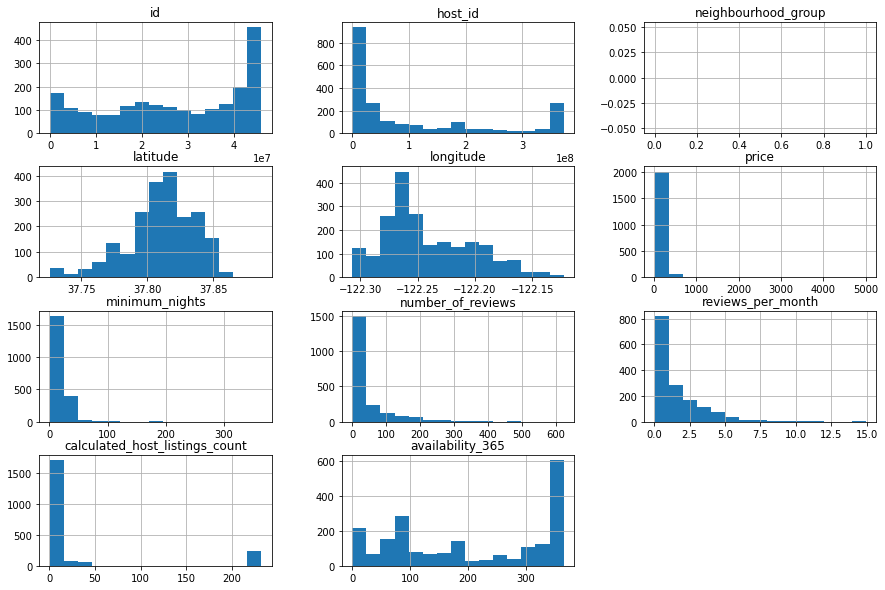

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(15,10));

In [7]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2082.000000,2082.000000,2082.000000,1540.000000,2082.000000,2082.000000
mean,133.794909,10.398175,40.791547,1.567955,29.692603,203.348703
std,184.763081,17.690175,70.814848,1.764225,71.965337,132.702767
min,17.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,2.000000,0.000000,0.310000,1.000000,83.000000
50%,100.000000,3.000000,9.000000,0.890000,2.000000,179.000000
75%,153.000000,14.000000,47.750000,2.250000,6.000000,356.000000
max,5000.000000,365.000000,623.000000,14.950000,232.000000,365.000000


Desse resumo, podemos inferir que:


*   Na variável `price`, os preços de algumas entradas destoam significamente da média. Até 75% dos valores, os preços atigem ao máximo 153. Portanto, é plausível afirmar que há uma parcela pequena de preços bem maiores que os demais trazendo "a média para direita". 
*   Na variável `minimum_nights`, acontece algo semelhante porque algumas moradias estão disponíveis somente para um tempo bem mais extenso que o usual. 


#### Boxplot para minimum_nights

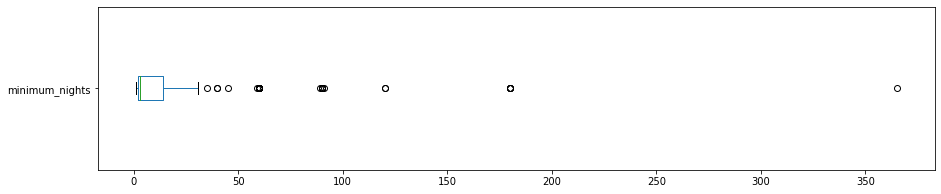

minimum_nights: valores acima de 30:
64 entradas
3.0740%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

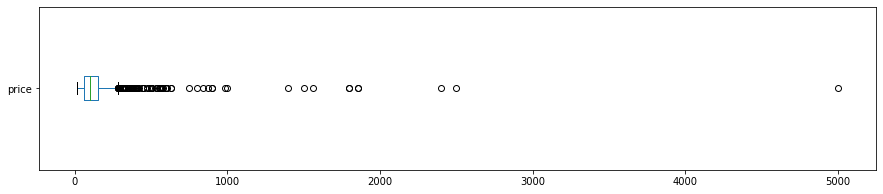


price: valores acima de 500
34 entradas
1.6330%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem outliers

Agora, podemos retirar esses valores e observar novamente os histogramas afim de fazer uma análise que não seja atrapalhada por comportamento pontuais distoantes.

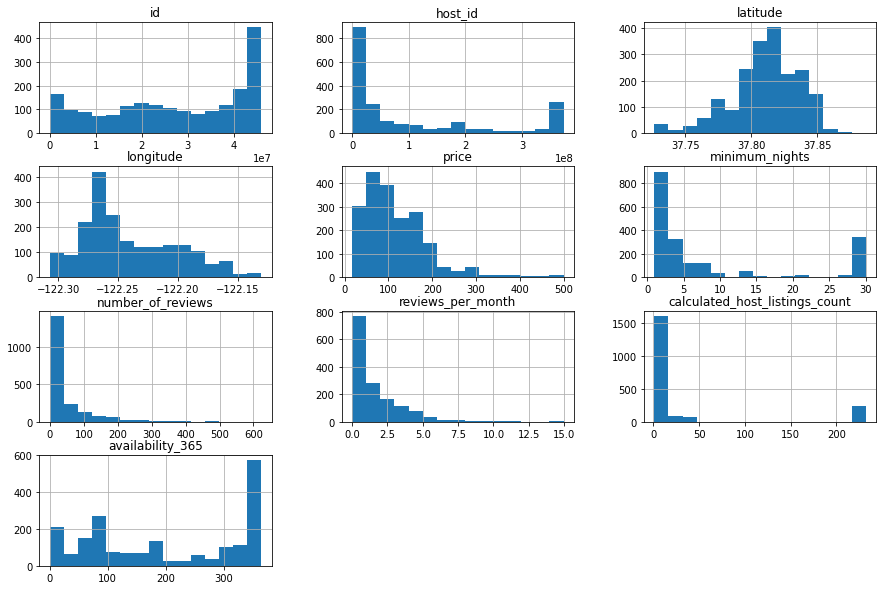

In [10]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**


In [11]:
# ver a média da coluna `price` com outliers
print("Média de preços: {}".format(df.price.mean()))

Média de preços: 133.7949087415946


In [12]:
# ver a média da coluna `price` sem outliers
print("Média de preços: {}".format(df_clean.price.mean()))

Média de preços: 117.47129909365559


### **Q4. Qual a correlação existente entre as variáveis**

Agora, podemos procurar por relações entre as variáveis através do cálculo da **correlação**. Para isso, cria-se uma matrz de correlação e um *heatmap*.

In [13]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.187386,-0.097846,-0.068000,0.236048,0.129251
minimum_nights,0.187386,1.000000,-0.248560,-0.186728,0.717451,0.326791
number_of_reviews,-0.097846,-0.248560,1.000000,0.693161,-0.224873,-0.076937
reviews_per_month,-0.068000,-0.186728,0.693161,1.000000,-0.116742,-0.090980
calculated_host_listings_count,0.236048,0.717451,-0.224873,-0.116742,1.000000,0.403966
availability_365,0.129251,0.326791,-0.076937,-0.090980,0.403966,1.000000


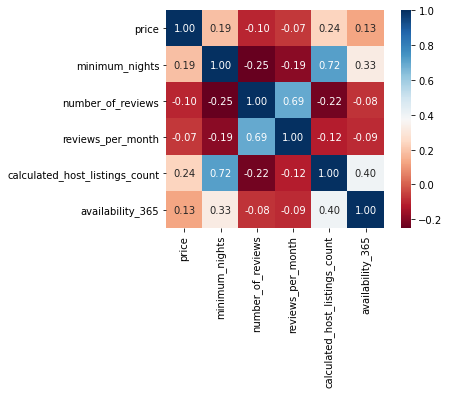

In [14]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` explicita o tipo de locação anunciada pelo Airbnb. As opções possíveis são apartamentos/casas inteiras, um quarto ou até mesmo dividir o quarto com outras pessoas.

Para contar a quantidade de entradas com cada tipo de aluguel, usamos o método `value_counts()`.

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
rooms = df_clean.room_type.value_counts()
rooms

Entire home/apt    1238
Private room        642
Shared room         106
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
for room_type, per in zip(rooms.index, rooms / df_clean.shape[0]):
  print("{} : {:.2%}".format(room_type ,per))

Entire home/apt : 62.34%
Private room : 32.33%
Shared room : 5.34%


### **Q6. Qual a localidade mais cara do dataset?**



Essa pergunta é geral, portanto apenas ver os preços por bairros em média não é suficiente. Afinal, alguns bairros tem poucas moradias disponíveis para serem avaliados e também pode ser que aquela moradia em específico seja barata ou cara. Portanto, é interessante analisar os bairros com um número significativo de casas. 

In [17]:
df_clean.neighbourhood.value_counts().describe()

count    121.000000
mean      16.413223
std       21.549427
min        1.000000
25%        4.000000
50%       10.000000
75%       23.000000
max      183.000000
Name: neighbourhood, dtype: float64

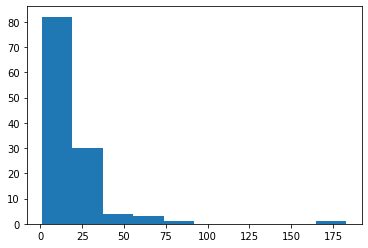

In [28]:
plt.hist(df_clean.neighbourhood.value_counts(), bins = 10);

Vamos escolher 4, porque assim a maioria dos bairros são inclusos e também se trata de um valor razoável para estimar os preços. Dessa forma, obtemos uma lista dos 10 bairros mais caros de acordo com nossa métrica. 

In [69]:
# ver preços por bairros com ao menos 10 moradias para alugar, na média
neighbourhoods = df_clean.neighbourhood.value_counts() >= 4
expensive_prices = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)
expensive_prices[neighbourhoods][:10]

neighbourhood
Piedmont             202.400000
Panoramic Hill       199.125000
Seminary             189.142857
Fruitvale Station    187.200000
Glen Highlands       181.571429
Forestland           180.500000
Pill Hill            173.956284
Chinatown            169.562500
Lakeshore            169.378378
Merriwood            166.772727
Name: price, dtype: float64

In [65]:
!pip install "mplleaflet"

lons = df_clean['longitude'].tolist()
lats = df_clean['latitude'].tolist()

plt.figure(figsize=(8,8))

plt.plot(lons, lats, 'r^')
mplleaflet.display()

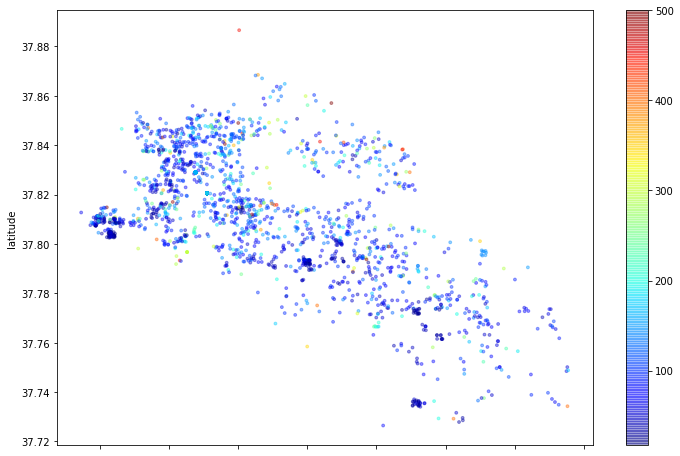

In [66]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [67]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

8.55840886203424

## Conclusões
